In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

ModuleNotFoundError: No module named 'scikeras'

In [1]:
print("water_quality")

water_quality


In [ ]:
#reading the dataset
import pandas as pd
df = pd.read_csv('water_quality.csv')
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000


In [ ]:
df.isna().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

In [ ]:
df = df.ffill()
df = df.bfill()
df.isna().sum()

Date                      0
Salinity (ppt)            0
DissolvedOxygen (mg/L)    0
pH                        0
SecchiDepth (m)           0
WaterDepth (m)            0
WaterTemp (C)             0
AirTemp (C)               0
dtype: int64

In [ ]:
df['Date']

0       1989-05-11
1       1989-05-18
2       1989-05-25
3       1989-06-01
4       1989-07-11
           ...    
2366    2019-11-05
2367    2019-11-05
2368    2019-11-05
2369    2019-11-05
2370    2019-11-05
Name: Date, Length: 2371, dtype: object

In [ ]:
date_list = df['Date'].tolist()

In [ ]:
date_list[0][0:4]

'1989'

In [ ]:
#) year column
for i in range(len(date_list)):
    year_list = date_list[i][0:4]
    year_list = int(year_list)

df['year'] = year_list
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C),year
0,1989-05-11,1.0,12.0,7.5,0.3,0.9,17.0,-17.777778,2019
1,1989-05-18,1.0,12.0,7.5,0.2,0.6,17.5,20.500000,2019
2,1989-05-25,1.0,12.0,8.0,0.4,0.8,23.0,25.000000,2019
3,1989-06-01,1.0,12.0,8.0,0.4,0.9,25.5,29.000000,2019
4,1989-07-11,1.0,12.0,8.5,0.3,0.9,28.5,28.000000,2019


In [ ]:
#) year column
for i in range(len(date_list)):
    month_list = date_list[i][6:8]
    year_list = int(year_list)

df['year'] = year_list
df.head()

In [ ]:
import re
date_splitting = re.split("-",date_list[0])
print(date_splitting[2])

11


In [ ]:
#) month column
for i in range(len(date_list)):
    date_splitting = re.split("-",date_list[i])
    month_list = int(date_splitting[1])

df['month'] =  month_list
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C),year,month
0,1989-05-11,1.0,12.0,7.5,0.3,0.9,17.0,-17.777778,2019,11
1,1989-05-18,1.0,12.0,7.5,0.2,0.6,17.5,20.500000,2019,11
2,1989-05-25,1.0,12.0,8.0,0.4,0.8,23.0,25.000000,2019,11
3,1989-06-01,1.0,12.0,8.0,0.4,0.9,25.5,29.000000,2019,11
4,1989-07-11,1.0,12.0,8.5,0.3,0.9,28.5,28.000000,2019,11


In [ ]:
#) day column
for i in range(len(date_list)):
    date_splitting = re.split("-",date_list[i])
    day_list = int(date_splitting[2])

df['day'] = day_list
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C),year,month,day
0,1989-05-11,1.0,12.0,7.5,0.3,0.9,17.0,-17.777778,2019,11,5
1,1989-05-18,1.0,12.0,7.5,0.2,0.6,17.5,20.500000,2019,11,5
2,1989-05-25,1.0,12.0,8.0,0.4,0.8,23.0,25.000000,2019,11,5
3,1989-06-01,1.0,12.0,8.0,0.4,0.9,25.5,29.000000,2019,11,5
4,1989-07-11,1.0,12.0,8.5,0.3,0.9,28.5,28.000000,2019,11,5


In [ ]:
df = df.drop(['Date'],axis=1)
df

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C),year,month,day
0,1.0,12.0,7.5,0.3,0.9,17.0,-17.777778,2019,11,5
1,1.0,12.0,7.5,0.2,0.6,17.5,20.500000,2019,11,5
2,1.0,12.0,8.0,0.4,0.8,23.0,25.000000,2019,11,5
3,1.0,12.0,8.0,0.4,0.9,25.5,29.000000,2019,11,5
4,1.0,12.0,8.5,0.3,0.9,28.5,28.000000,2019,11,5
...,...,...,...,...,...,...,...,...,...,...
2366,0.0,4.6,7.0,0.3,0.5,14.0,11.111111,2019,11,5
2367,0.0,4.6,7.0,0.3,0.5,14.0,-17.777778,2019,11,5
2368,0.0,3.9,6.5,0.3,1.8,22.0,21.111111,2019,11,5
2369,1.0,3.9,7.0,0.6,1.0,17.0,21.111111,2019,11,5


In [ ]:
df = df[['year',	'month',	'day',
    'DissolvedOxygen (mg/L)',	'pH','SecchiDepth (m)',
    'WaterDepth (m)',	'WaterTemp (C)',	'AirTemp (C)','Salinity (ppt)']]
df

,year,month,day,DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C),Salinity (ppt)
0,2019,11,5,12.0,7.5,0.3,0.9,17.0,-17.777778,1.0
1,2019,11,5,12.0,7.5,0.2,0.6,17.5,20.500000,1.0
2,2019,11,5,12.0,8.0,0.4,0.8,23.0,25.000000,1.0
3,2019,11,5,12.0,8.0,0.4,0.9,25.5,29.000000,1.0
4,2019,11,5,12.0,8.5,0.3,0.9,28.5,28.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
2366,2019,11,5,4.6,7.0,0.3,0.5,14.0,11.111111,0.0
2367,2019,11,5,4.6,7.0,0.3,0.5,14.0,-17.777778,0.0
2368,2019,11,5,3.9,6.5,0.3,1.8,22.0,21.111111,0.0
2369,2019,11,5,3.9,7.0,0.6,1.0,17.0,21.111111,1.0


In [ ]:
df['Salinity (ppt)'].unique()

array([1.  , 3.4 , 3.2 , 4.2 , 2.8 , 2.9 , 3.  , 1.8 , 4.1 , 2.5 , 4.5 ,
       3.7 , 2.1 , 3.5 , 3.8 , 3.9 , 2.4 , 0.7 , 0.5 , 0.4 , 0.9 , 1.2 ,
       0.  , 2.6 , 1.3 , 9.  , 4.7 , 6.2 , 3.3 , 2.  , 1.4 , 2.2 , 1.6 ,
       5.  , 4.3 , 5.1 , 4.8 , 5.4 , 1.7 , 1.5 , 2.3 , 2.25, 4.  , 5.5 ,
       4.4 , 3.1 , 1.9 , 1.1 , 0.2 , 0.1 , 0.3 , 0.08, 0.8 , 0.01, 0.05,
       8.  , 0.66, 0.18, 0.6 , 0.09, 0.24])

In [ ]:
# split into input (X) and output (Y) variables
from sklearn.model_selection import train_test_split
X = df.drop(['Salinity (ppt)'],axis=1)
y = df['Salinity (ppt)']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=9, activation='relu'))
model.add(Dense(64, activation='linear'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_83 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#) training the neural network without applying standard scaler
history = model.fit(x_train,y_train,validation_split=0.2, epochs=10)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5183 - mse: 1.5183 - val_loss: 1.3080 - val_mse: 1.3080
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1631 - mse: 1.1631 - val_loss: 1.2024 - val_mse: 1.2024
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0967 - mse: 1.0967 - val_loss: 1.2547 - val_mse: 1.2547
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1563 - mse: 1.1563 - val_loss: 1.2049 - val_mse: 1.2049
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0671 - mse: 1.0671 - val_loss: 1.2003 - val_mse: 1.2003
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2070 - mse: 1.2070 - val_loss: 1.2224 - val_mse: 1.2224
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1015 - mse: 1.1015 - val_loss: 1.1885 - val_mse: 1.1885
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0420 - mse: 1.0420 - val_loss: 1.2541 - val_mse: 1.2541
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1044 - mse: 

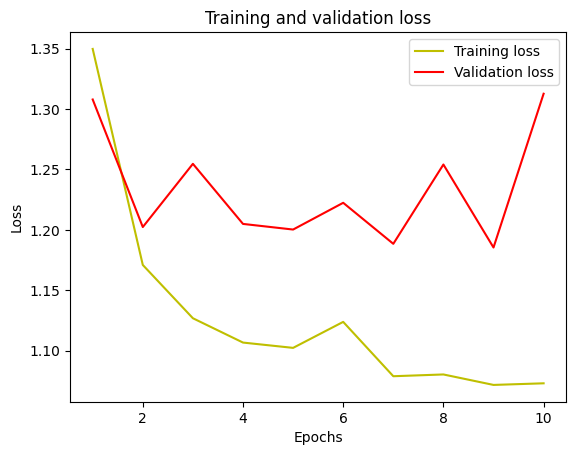

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

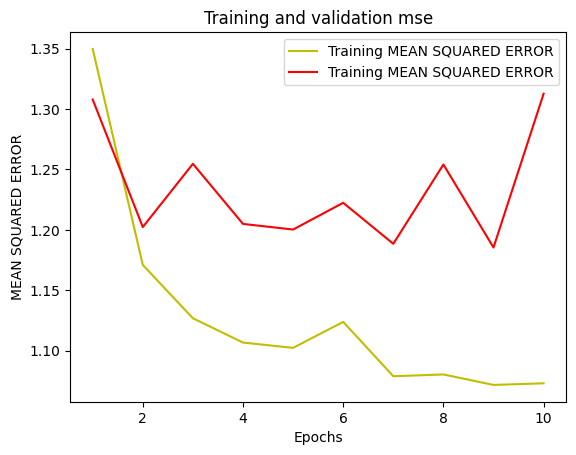

In [ ]:
accuracy = history.history['mse']
val_accuracy = history.history['val_mse']
plt.plot(epochs, accuracy, 'y', label='Training MEAN SQUARED ERROR')
plt.plot(epochs, val_accuracy, 'r', label='Training MEAN SQUARED ERROR')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('MEAN SQUARED ERROR')
plt.legend()
plt.show

In [ ]:
#)predict on test data
y_pred = model.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
#) mae model of test data
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared Error:", mse)

Mean squared Error: 1.0070163875949951


In [ ]:
print("prediction values", y_pred[:5])
print("actual values", y_test[:5])

prediction values [[1.048479  ]
 [0.45122707]
 [2.333614  ]
 [0.21586773]
 [0.25762087]]
actual values 351    2.5
785    0.0
219    2.8
661    2.0
671    2.0
Name: Salinity (ppt), dtype: float64
